# Ⅰ. 주요 개념

# 1. 용어 정리

## (1) OCR 의의
- OCR(Optical Character Recognition, 광학 문자 인식)
- 문자를 읽는 기술인 OCR은 산업적으로 매우 유용한 기술임.

## (2) 다양한 OCR 기술 활용 사례
- 우편번호 추출을 통한 우편물 관리
- 자동차 번호판 인식
- 모바일 기기를 사용한 명함 인식
- 신용카드 읽기를 이용한 결제 서비스
- 컨테이너 일련번호 인식을 이용한 스마트 선박 시스템

## (3) 모델의 강건성(robust)
- 강건성(Robustness) 의의 : 구조적으로 튼튼하고 건강해지는 특성이다. 체계에 관한 맥락에서는 체계의 기능적인 측면에 영향을 끼칠만한 동요를 견디는 능력을 가리킨다. 다시 말하자면 강건성은 "초기의 안정한 배열의 적응 없이 변화에 저항하는 체계의 능력"이라고 정의할 수 있다. "작은 문제에서의 강건성"은 동요의 크기가 작을 때, "크다", "작다"는 개념의 적용은 맥락에 따라 달라지기 때문에 "작은" 크기 가설은 입증하기 어려울 수 있다는 것을 고려하는 상황을 가리킨다. 대조적으로 "큰 문제에서의 강건성"은 동요의 크기에 대해 크든 작든 어떠한 가정도 할 수 없는 상황을 가리킨다. 사람들은 강건성은 저항성(resistance), 회피성(avoidance)의 두 가지 차원을 가지고 있다고 이야기해왔다
- 강건성 확보 방안 : 가려진 케이스에 대한 데이터, Augmentation

# 2. ORC모델 소개

## (1) google_OCR API
- 검출과정과 인식과정이 분리됨
- 검출모델 : CRAFT(Character Region Awareness for Text Detection)
- 인식모델 : CRNN

## (2) keras-ocr
- 텐서플로우의 케라스 API를 기반으로 이미지 속 문자를 읽는 End-to-End OCR을 할 수 있게 해줌.
- 검출모델 : CRAFT(Character Region Awareness for Text Detection)
- 인식모델 : CRNN

## (3) 테서랙트(Tesseract OCR)
- 구글에서 후원하는 OCR 오픈소스 라이브러리로 현재는 버전 4와 Tesseract.js등으로 확장되는 등 많은 곳에서 사용
- 버전 4에서는 LSTM이 엔진에 추가되었고 현재 한국어를 포함한 116 개 국어를 지원
- 한 번에 검출(detection)과 인식(recognition)을 수행함.

# Ⅱ. 프로세스와 주요 함수/클래스

# 1. 프로세스

## (1) 이미지에서 문자 인식 과정

- 문자 인식 모델은 Text Detection과 Recognition 두 과정을 통해서 사진 속의 문자를 읽을 수 있게 됩니다.

### 1) Text Detection(문자검출)
- 입력받은 사진 속에서 문자의 위치를 찾아냄
- 언급된 문자의 영역을 표현하는 방법에는 축에 정렬된 사각형인 Bounding box 그리고 돌아간 사각형 Oriented bounding box, 자유로운 사각형은 Quadrangle 그리고 다각형인 Polygon, Pixel 수준으로 영역을 표현한 Mask 등이 있습니다.

### 2) Text Recognition(문자인식)
- 찾은 문자 영역으로부터 문자를 읽어내는 과정

## (2) 딥러닝 기반 객체 검출방법

### 1) Regression(회귀) 방식
- 기준으로 하는 박스 대비 문자의 박스가 얼마나 차이가 나는지를 학습

### 2) Segmentation방식 
- 픽셀 단위로 해당 픽셀이 문자를 포함하는지를 분류하는 문제(pixel-wise classification)

### 3) 문자와 일반객체와의 차이점
- 일반적인 객체는 물체에 따라서 크기가 일정한 특징을 가집니다. 하지만 문자는 영역과 배치가 자유로워 문자를 검출하기 위한 설정이 필요합니다.
- 또한 객체는 물체 간 거리가 충분히 확보되는 데에 반해 글자는 매우 촘촘하게 배치되어 있습니다.

### 4) 이미지 속 문자를 검출할 때 검출단위
- 문자, 단어, 줄, 단락 단위로 검출 가능

## (3) 사진 속 문자 읽어내기

### 1) Recognition
- 문자 인식은 사진 속에서 문자를 검출해내는 검출모델이 영역을 잘라서 주면 그 영역에 어떤 글자가 포함되어 있는지 읽어내는 과정
- CRNN : CNN과 RNN이 결합한 모델. 이미지 내의 텍스트와 연관된 특징을 CNN을 통해 추출한 후에 스탭 단위의 문자 정보를 RNN으로 인식함.

### 2) 문단/단락 구분 방법
- 이미지 내에서 검출된 단어 영역의 위치정보를 기준으로 분리
- x,y축으로 L2 Distance가 일정 이내인 단어 또는 문자들의 그룹을 만들어 단락으로 인식

# 2. 패키지의 함수/클래스 개요

### keras_ocr
- provides out-of-the-box OCR models and an end-to-end training pipeline to build new OCR models.
### keras_ocr.tools.read(filepath_or_buffer)
- Read a file into an image object
### keras_ocr.tools.drawAnnotations((image, predictions, ax=None)
- Draw text annotations onto image.
### PIL
- 이미지 분석 및 처리를 쉽게 할 수 있는 라이브러리(Python imaging Library)
##### 주요기능
+ 픽셀 단위의 조작
+ 마스킹 및 투명도 제어
+ 흐림, 윤곽 보정 다듬어 윤곽 검출 등의 이미지 필터
+ 선명하게, 밝기 보정, 명암 보정, 색 보정 등의 화상 조정
+ 이미지에 텍스트 추가
+ 기타 여러 가지
### pytesseract
- 파이썬용 광학 문자 인식 도구
##### 주요기능
+ get_languages Tesseract OCR에서 현재 지원하는 모든 언어를 반환합니다.
+ image_to_string Tesseract OCR 처리에서 수정되지 않은 출력을 문자열로 반환합니다.
+ image_to_boxes 인식 된 문자와 해당 상자 경계를 포함하는 결과를 반환합니다.
+ image_to_data 상자 경계, 신뢰도 및 기타 정보가 포함 된 결과를 반환합니다. Tesseract 3.05 이상이 필요합니다. 자세한 내용은 Tesseract TSV 문서 를 확인하십시오.
+ run_and_get_output Tesseract OCR에서 원시 출력을 반환합니다. tesseract로 전송되는 매개 변수를 좀 더 제어 할 수 있습니다.
### tesseract-ocr-kor 
- 한글 언어팩
### keras_ocr.pipeline.Pipeline() 
- 인식을 위한 파이프라인을 생성. 
- 초기화 과정에서 미리 학습된 모델의 가중치(weight)를 불러오게 됨 
- 검출기와 인식기를 위한 가중치 하나씩을 불러옴

# Ⅲ. 프로젝트 : 다양한 OCR모델 비교하기

# 1. 검증용 데이터 셋 준비

In [2]:
# 모듈 import
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

work_path = os.getenv('HOME')+'/aiffel/Exploration/18_ocr_python/test_images'
img_files = os.getenv('HOME')+'/aiffel/Exploration/18_ocr_python/test_images/*.jpg'
# 이미지 불러오기
img_filenames = tf.io.gfile.glob(str(img_files))
img_filenames

['/aiffel/aiffel/Exploration/18_ocr_python/test_images/test_image_08.jpg',
 '/aiffel/aiffel/Exploration/18_ocr_python/test_images/test_image_06.jpg',
 '/aiffel/aiffel/Exploration/18_ocr_python/test_images/test_image_09.jpg',
 '/aiffel/aiffel/Exploration/18_ocr_python/test_images/test_image_10.jpg',
 '/aiffel/aiffel/Exploration/18_ocr_python/test_images/test_image_07.jpg']

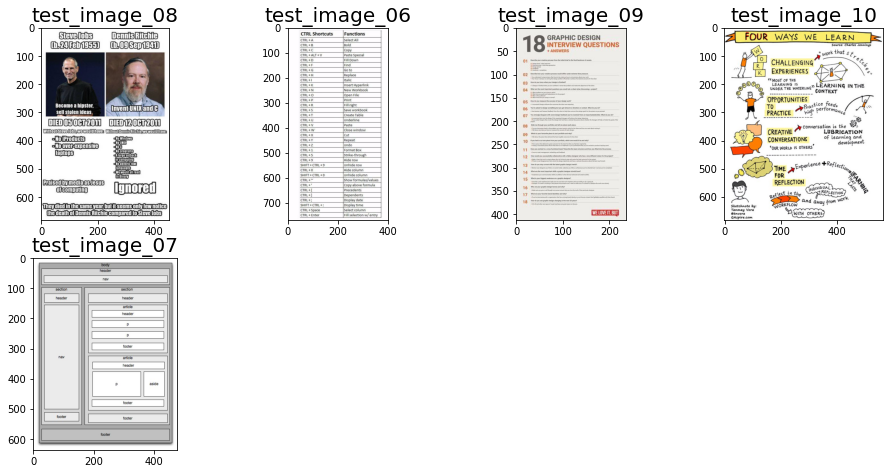

In [3]:
image_titles = []
images = []
for filename in img_filenames:
    image = cv2.imread(filename)
    images.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    image_titles.append(os.path.splitext(os.path.basename(filename))[0])
image_titles

# 테스트 이미지 시각화
plt.figure(figsize=(16, 12))
for i, (image, title) in enumerate(zip(images, image_titles)):
    plt.subplot(3, 4, i+1)
    plt.imshow(image)
    plt.title(title, fontsize=20)

# 2. Google OCR API, keras-ocr, Tesseract로 테스트 진행

## (1) 구글 OCR API

In [4]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [5]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/Exploration/18_ocr_python/inspiring-being-310311-eeeaf0154729.json'


google_ocr = []

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
for filenames in img_filenames:
    google_ocr.append(detect_text(filenames))

total 2232
-rw-r--r-- 1 root root 1803664 Nov 28 14:15 18_ocr_python_3models_comparison.ipynb
-rw-r--r-- 1 root root  466615 Nov 28 00:03 18_ocr_python.ipynb
drwxr-xr-x 3 root root    4096 Nov 28 01:51 images
-rw-r--r-- 1 root root    2345 Nov 25 00:07 inspiring-being-310311-eeeaf0154729.json
drwxr-xr-x 3 root root    4096 Nov 28 05:30 test_images
Texts:

"Steve Jobs
h.24Feb1955)
Dennis Ritchie
1.09 Sep 1940
Become a hipster,
sell stolen ideas
Invent UNIX andC
DIED 120CT 2011
DIED05OCT 2011
Without Stevelobs,wewould have: WithoutDennis fitchie,wewould hae
-No iProducts
-No over-expensive
laptops
lo Windows
HOUNIX
Ho programs
CAlarge setback
In computing
To generic text
languages
We would all read
In Binary
Praised by media asJesus
ofcomputing
Ignored
They died in the same year, but it seems only few notice
the death of Dennis Ritchie compared to Steve Jobs
"

"Steve"

"Jobs"

"h.24Feb1955)"

"Dennis"

"Ritchie"

"1.09"

"Sep"

"1940"

"Become"

"a"

"hipster,"

"sell"

"stolen"

"ideas

## (2) keras-ocr 써보기

In [6]:
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [7]:
img_filenames

['/aiffel/aiffel/Exploration/18_ocr_python/test_images/test_image_08.jpg',
 '/aiffel/aiffel/Exploration/18_ocr_python/test_images/test_image_06.jpg',
 '/aiffel/aiffel/Exploration/18_ocr_python/test_images/test_image_09.jpg',
 '/aiffel/aiffel/Exploration/18_ocr_python/test_images/test_image_10.jpg',
 '/aiffel/aiffel/Exploration/18_ocr_python/test_images/test_image_07.jpg']

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


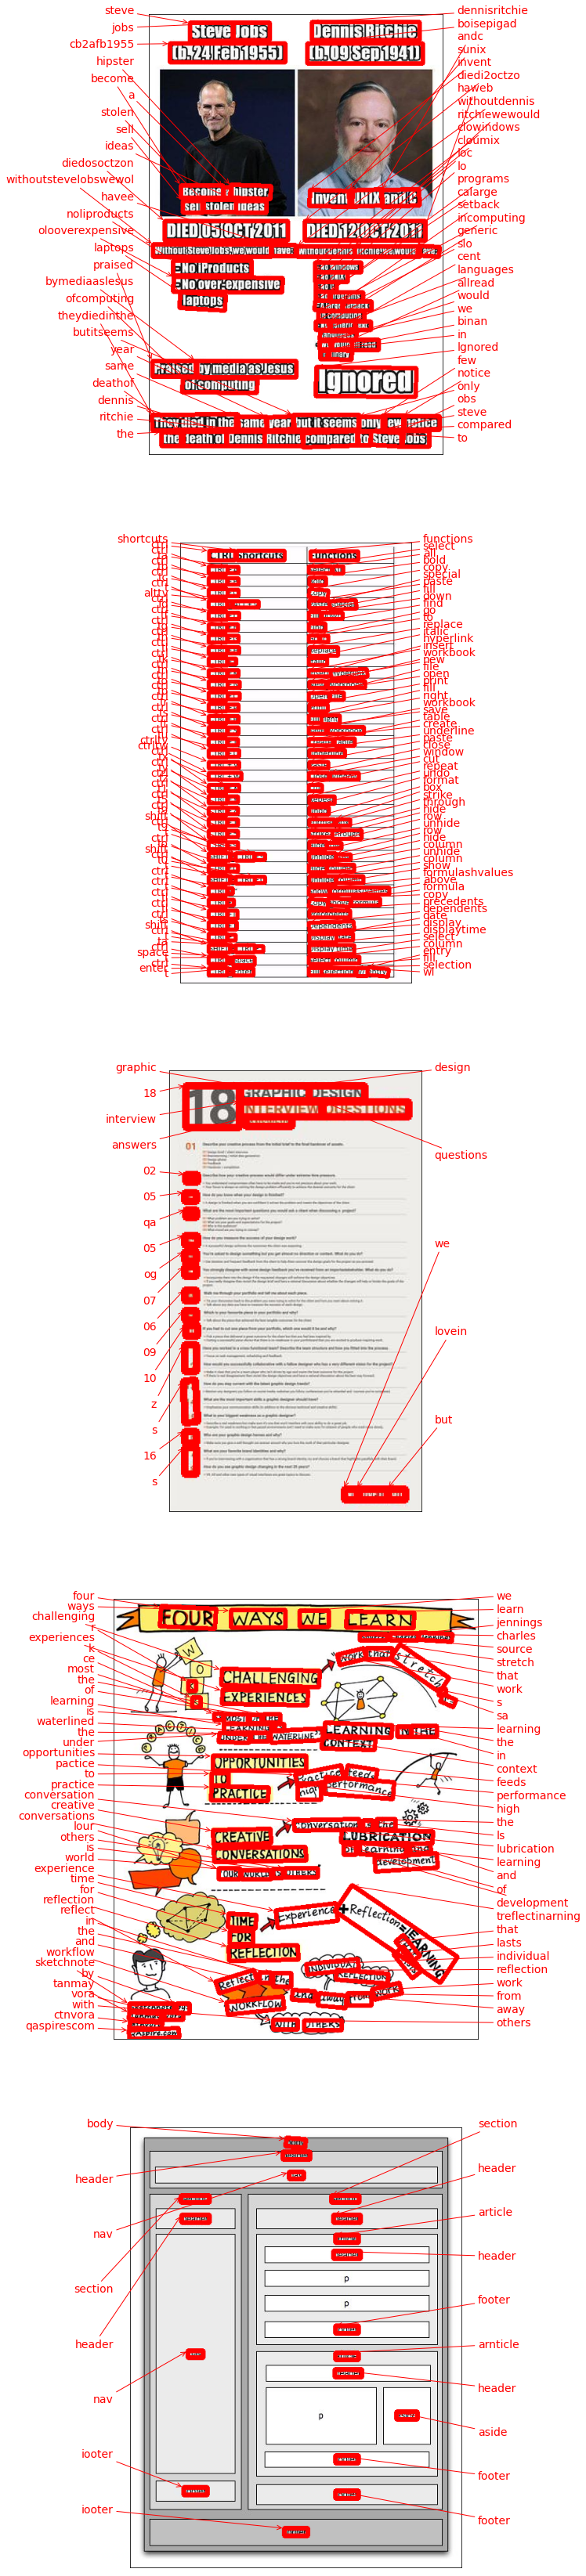

In [8]:
# import keras_ocr
# images = [ keras_ocr.tools.read(img) for img in img_file_paths]
prediction_groups = [pipeline.recognize([filename]) for filename in img_filenames]


# 인식 결과 시각화
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 60))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## (3) 테서랙트 OCR

In [9]:
import pytesseract
from PIL import Image
from pytesseract import Output
#import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [10]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [11]:
#img_file_paths = os.getenv('HOME')+'/aiffel/Exploration/18_ocr_python/test_images/*.jpg'
img_filenames

['/aiffel/aiffel/Exploration/18_ocr_python/test_images/test_image_08.jpg',
 '/aiffel/aiffel/Exploration/18_ocr_python/test_images/test_image_06.jpg',
 '/aiffel/aiffel/Exploration/18_ocr_python/test_images/test_image_09.jpg',
 '/aiffel/aiffel/Exploration/18_ocr_python/test_images/test_image_10.jpg',
 '/aiffel/aiffel/Exploration/18_ocr_python/test_images/test_image_07.jpg']

In [13]:
work_dir = (os.path.join(work_path, title))
work_dir

'/aiffel/aiffel/Exploration/18_ocr_python/test_images/test_image_08'

In [18]:
for img_filename in img_filenames:
    cropped_image_path_list = crop_word_regions(img_filenames, work_dir)

AttributeError: 'list' object has no attribute 'read'

In [15]:
filename01 = '/aiffel/aiffel/Exploration/18_ocr_python/test_images/test_image_08.jpg'
cropped_image_path_list = crop_word_regions(filename01, work_dir)
cropped_image_path_list

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [12]:
# 각 이미지 별 폴더 생성하여 croped 이미지 얻기
for filename, title in zip(img_filenames, image_titles):
    work_dir = (os.path.join(work_path, title))
    os.makedirs(work_dir, exist_ok=True)
    cropped_image_path_list = crop_word_regions(filename, work_dir)
    recognize_images(cropped_image_path_list)

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [48]:
print(filename, title)

/aiffel/aiffel/Exploration/18_ocr_python/test_images/test_image_08.jpg test_image_08


In [51]:
img_filenames[0]

'/aiffel/aiffel/Exploration/18_ocr_python/test_images/test_image_08.jpg'

In [50]:
work_dir = (os.path.join(work_path, title))
# work_dir

for img_file in img_filenames:
    cropped_image_path_list = crop_word_regions(img_filenames, work_dir)

AttributeError: 'list' object has no attribute 'read'

In [47]:
#work_dir = os.getenv('HOME')+'/aiffel/Exploration/18_ocr_python'
#img_file_path = work_dir + '/ocr_test.PNG'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_filename, work_dir)

NameError: name 'img_filename' is not defined

In [ ]:
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

# Ⅳ. 결론

## 1. 결과 분석
- google.ocr.API와 keras_ocr은 정상적으로 이미지에서 글자를 추출/인식하였다.
- 일부 keras_ocr에서는 H를 N으로 잘못 읽는 경우도 있음
- tesseract는 실패하였다. 

## 2. 차후 과제

- tesseract가 한글 구현이 가능하므로 별도로 구현을 완성해야겠다.